# **Desafio 3**: A Combustão do Tolueno
**Avaliação por pares no final do notebook**

---







No desafio 1 e 2, uma tonelada da mistura **benzeno-tolueno** (80% tolueno) passou pelo processo de destilação fracionada, de modo a ser obtido 800kg de tolueno puro. Vale relembrar que foi considerado um comportamento de mistura ideal para realizar a separação, uma vez que os compostos são similares entre si e distinguem-se apenas em relação a um único grupamento metil. Dessa forma, com o composto puro é possível seguir para a etapa de combustão para a geração de energia, cuja reação balanceada é dada por

$$C_7H_8 + 9O_2 \rightarrow 7CO_2 + 4H_2O.$$



Para isso, é indispensável que os potenciais termodinâmicos como a **Entalpia**, **Energia Livre de Gibbs** e **Energia Interna** sejam calculados para que sejam determinadas a quantidade de calor gerado e posterior eficiência da produção de energia elétrica.



## **Entalpia**

A função termodinâmica da entalpia é obtida quando a Transformada de Legendre da Energia Interna **U(V, S, N,..., N_n)** é realizada em relação ao volume (V). Assim, a versão diferencial da entalpia **H = U + PV** encontrada pela transformação é $$ dH = \Sigma μ dN + VdP + TdS. $$ Entretanto, quando a pressão é constante, a entalpia é equivalente ao calor e pode ser descrita como $$dH = d'qP,$$ em que o calor é um termo diferencial inexato, pois depende de outros parâmetros além das condições iniciais e finais do sistema.


Quando há variação da temperatura, a entalpia pode ser escrita em função da Capacidade Calorífica (Cp) que, para muitos compostos, podem ter suas medidas experimentais encontradas na literatura. Dessa forma, $$ΔH = ∫Cp(T) dT. $$

Os dados de Capacidade Calorífica para o **tolueno**, **água**, **CO2** e **O2** foram obtidos por meio do banco de dado NIST e integrados por meio da função **trapz** do numpy, que utiliza a Regra do Trapézio para calcular a área abaixo de uma curva. Além disso, o intervalo de temperatura levado em consideração foi baseado na temperatura ebulição do tolueno (383,15 K) e na sua temperatura de autoignição (753,15 K). A escolha desse intervalo foi realizada, pois é desejável que a substância esteja no estado gasoso e, além disso, por questões de segurança, a temperatura limite seja a de autoingnição para evitar que a combustão ocorra espontaneamente, podendo causar explosões. Com a adição das limitações da quantidade de dados experimentais, o intervalo ficou restrito de 500 K a 700K

### Importações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

### Dados

In [ ]:
T_tolueno = [500, 500.2, 600, 700]
Cp_tolueno = [170.8, 171.46, 196.2, 217.0]
T_O2 = [500, 600, 700]
Cp_O2 = [31.08, 32.11, 32.98]
T_agua = [500, 600, 700]
Cp_agua = [35.22, 36.32, 37.50] 
T_CO2 = [500, 600, 700]
Cp_CO2 = [44.61, 47.32, 49.57]

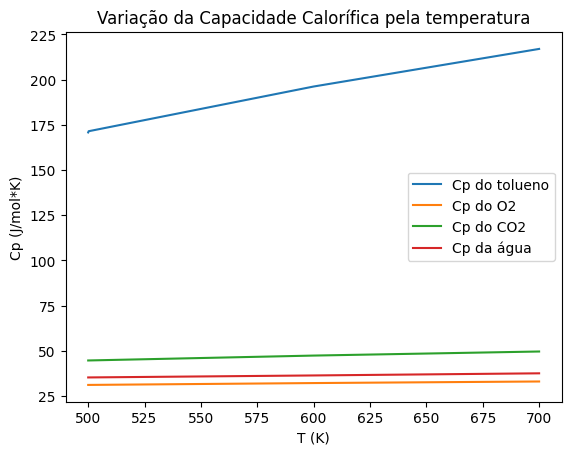

In [ ]:
plt.title('Variação da Capacidade Calorífica pela temperatura')
plt.plot( T_tolueno, Cp_tolueno, label='Cp do tolueno')
plt.plot( T_O2, Cp_O2, label='Cp do O2')
plt.plot( T_CO2, Cp_CO2, label='Cp do CO2')
plt.plot( T_agua, Cp_agua, label='Cp da água')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Cp (J/mol*K)')
plt.show()

### Cálculo das entalpias

In [ ]:
entalpia_tolueno = np.trapz(Cp_tolueno, T_tolueno)
entalpia_O2 = np.trapz(Cp_O2, T_O2)
entalpia_agua = np.trapz(Cp_agua, T_agua)
entalpia_CO2 = np.trapz(Cp_CO2, T_CO2)

print("Entalpia do CO2:", entalpia_CO2)
print("Entalpia da água:", entalpia_agua)
print("Entalpia do O2:", entalpia_O2)
print("Entalpia do tolueno:", entalpia_tolueno)

Entalpia do CO2: 9441.0
Entalpia da água: 7267.999999999999
Entalpia do O2: 6414.0
Entalpia do tolueno: 39040.46


Dada a reação balanceada  $$C_7H_8 + 9O_2 \rightarrow 7CO_2 + 4H_2O, $$ os coeficientes estequiométricos são levados em consideração para o cálculo da entalpia dos produtos e reagentes, para que a entalpia final de combustão para um mol $$ΔH = ΔH_p - ΔH_r$$ seja encontrada.

In [ ]:
entalpia_reagentes = entalpia_tolueno + 9*entalpia_O2
entalpia_produtos = 7*entalpia_CO2 + 4*entalpia_agua
entalpia_combustao = entalpia_produtos - entalpia_reagentes

print("A entalpia de combustão considerando um mol de tolueno é:", entalpia_combustao, "J")

A entalpia de combustão considerando um mol de tolueno é: -1607.4599999999919 J



Como foram obtidos 800kg de tolueno a partir da purificação por destilação fracionada, é preciso calcular qual é a entalpia total liberada.

In [54]:
massa_molar_tolueno = 92.14 # em g/mol
massa_tolueno = 800*1000 # em g

numero_mols = massa_tolueno/massa_molar_tolueno
entalpia_total = numero_mols*entalpia_combustao


print("A entalpia total liberada a partir de 800kg de tolueno é de", entalpia_total, "J")

A entalpia total liberada a partir de 800kg de tolueno é de -13956674.625569714 J


## **Entropia**

A função de estado da entropia pode ser definida a partir dos dados de Capacidade Calorífica assim como entalpia, entretanto é determinada pela integral $$ΔS = ∫\frac{Cp}{T}dT. $$ Os cálculos das áreas também são feitos pela função **trapz** e utilizam os mesmos dados de Cp utilizados anteriormente para a entalpia.

#### **Dados**

In [ ]:
df_tolueno = pd.DataFrame({'Temperatura' : T_tolueno,'Cp' : Cp_tolueno})
df_tolueno['Cp/T'] = df_tolueno['Cp']/df_tolueno['Temperatura']
df_tolueno

,Temperatura,Cp,Cp/T
0,500.0,170.80,0.341600
1,500.2,171.46,0.342783
2,600.0,196.20,0.327000
3,700.0,217.00,0.310000


In [ ]:
df_O2 = pd.DataFrame({'Temperatura' : T_O2, 'Cp' : Cp_O2})
df_O2['Cp/T'] = df_O2['Cp']/df_O2['Temperatura']
df_O2

,Temperatura,Cp,Cp/T
0,500,31.08,0.062160
1,600,32.11,0.053517
2,700,32.98,0.047114


In [ ]:
df_CO2 = pd.DataFrame({'Temperatura' : T_CO2, 'Cp' : Cp_CO2})
df_CO2['Cp/T'] = df_CO2['Cp']/df_CO2['Temperatura']
df_CO2

,Temperatura,Cp,Cp/T
0,500,44.61,0.089220
1,600,47.32,0.078867
2,700,49.57,0.070814


In [ ]:
df_agua = pd.DataFrame({'Temperatura' : T_agua, 'Cp' : Cp_agua})
df_agua['Cp/T'] = df_agua['Cp']/df_agua['Temperatura']
df_agua

,Temperatura,Cp,Cp/T
0,500,35.22,0.070440
1,600,36.32,0.060533
2,700,37.50,0.053571


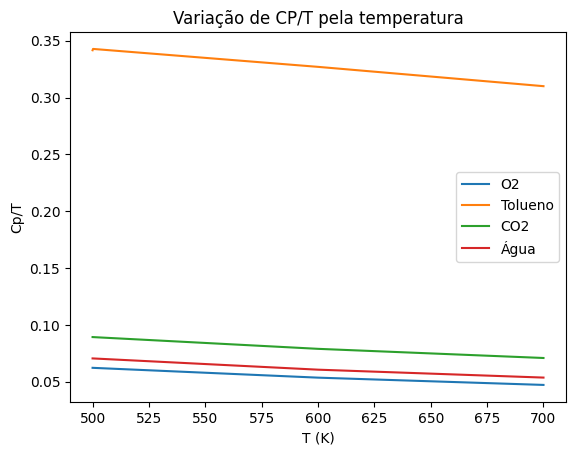

In [ ]:
plt.title('Variação de CP/T pela temperatura')
plt.plot(df_O2['Temperatura'], df_O2['Cp/T'], label='O2')
plt.plot(df_tolueno['Temperatura'], df_tolueno['Cp/T'], label='Tolueno')
plt.plot( df_CO2['Temperatura'], df_CO2['Cp/T'], label='CO2')
plt.plot(df_agua['Temperatura'], df_agua['Cp/T'], label='Água')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Cp/T')
plt.show()

### Cálculo das entropias

In [ ]:
entropia_tolueno = np.trapz(df_tolueno['Temperatura'], df_tolueno['Cp/T'])
entropia_CO2 = np.trapz(df_CO2['Temperatura'], df_CO2['Cp/T'])
entropia_O2 = np.trapz(df_O2['Temperatura'], df_O2['Cp/T'])
entropia_agua = np.trapz(df_agua['Temperatura'], df_agua['Cp/T'])
print("Entropia do tolueno:", entropia_tolueno)
print("Entropia do CO2:", entropia_CO2)
print("Entropia do O2:", entropia_O2)
print("Entropia do água:", entropia_agua)

Entropia do tolueno: -19.140604342263103
Entropia do CO2: -10.928380952380946
Entropia do O2: -8.915380952380954
Entropia do água: -9.973904761904766


In [ ]:
entropia_reagentes = entropia_tolueno + 9*entropia_O2
entropia_produtos = 7*entropia_CO2 + 4*entropia_agua
entropia_combustao = entropia_produtos - entropia_reagentes
print("A entropia da reação de combustão considerando um mol de tolueno é:", entropia_combustao)

A entropia da reação de combustão considerando um mol de tolueno é: -17.015252800594


In [ ]:
entropia_total = numero_mols*entropia_combustao
print("Entropia total da combustão: ", entropia_total)

Entropia total da combustão:  -147733.90753717386


## **Energia Interna**

A energia interna representa a energia de uma substância associada aos movimentos, interações e ligações dos seus elementos constituintes.

$ \Delta_r U = \Delta_r H - V.\Delta P $

$ PV = nRT $

In [ ]:
def pressao(V,n,R,T):
    P = n*R*T/V
    return P

In [ ]:
V = 1.152
T = 753.15 # temperatura de combustão
n = numero_mols
R = 8.314

In [ ]:
pressao_t = pressao(V, n, R, T)
print('A pressão a 753.15 K equivale a', pressao_t, 'Pa.')

A pressão a 753.15 K equivale a 47193349.34158166 Pa.


In [ ]:
def variacao_pressao(p_i, p_f):
    var_p = p_f - p_i
    return var_p

In [ ]:
um_atm_p_pascal = 101325
p_i_tolueno = numero_mols*um_atm_p_pascal
var_p_tol = variacao_pressao(p_i_tolueno, pressao_t)
print('A variação de pressão vale', var_p_tol, 'Pa.')

A variação de pressão vale -832554859.9052167 Pa.


Cálculo da energia interna

In [ ]:
energia_interna = entalpia_total - V*var_p_tol
print('A variação da energia interna equivale a', energia_interna, 'J a 753,15 K.')

A variação da energia interna equivale a 945146523.9852399 J a 753,15 K.


## **Energia livre de Gibbs**

A energia livre de Gibbs é preve a espontaneidade e a direção das reações químicas e descreve os processos termodinâmicos em sistemas fechados ou em equilíbrio.

$ \Delta_r G = \Delta_r H - T.\Delta_r S$

In [84]:
EG = entalpia_total - T*entropia_total
print('A energia livre de Gibbs da reação de combustão do tolueno equivale a', EG, 'J a 753,15 KJ/mol.')

A energia livre de Gibbs da reação de combustão do tolueno equivale a 97309117.83605278 J a 753,15 KJ/mol.


A energia livre de Gibbs é positiva, portanto, a reação só acontecerá com a presença de uma energia externa ao sistema, já que ela não será espontânea.

## **Equação de Estado**

As equações de estados descrevem o comportamento de um sistema por meio da definição dos parâmetros como pressão e volume. Para tanto iremos considerar a equação de estado de Van der Waals:

$ (P+\frac{an^2}{V^2})(V-nb) = nRT $

Em que *a* e *b* são constantes empíricas e variam para cada tipo de gás. A constante *a* está relacionada com as forças de atração intermoleculares e a constante *b* está relacionada com o volume molecular.

A partir disso, poderemos encontrar o volume para combustão:

In [70]:
def volume_combustao(P1, a1, n1, R1, b1, T1):
    (P+a*n**2/V**2)*(V - n*b) == n*R*T
    return V

In [82]:
a = 2.489 # Pa m^6/mol^2
b = 0.0001499 #m^3/mol
T = 753.15 # temperatura de combustão
n = numero_mols
R = 8.314
P = pressao_t

In [79]:
VC = volume_combustao(P, a, n, R, b, T)
print("O volume de combustão é", VC, 'm^3 ou', VC*1000, 'L')

O volume de combustão é 1.152 m^3 ou 1152.0 L


Assim, como volume não é grande o suficiente para a pressão ser baixa, $ P + \frac{an^2}{V^2} $ não se assemelhará a $ P $. Portanto, $ nb $ também não poderá ser desconsiderado de $ V - nb $. Sendo assim, concluímos que o comportamento do tolueno não será parecido ao de um gás ideal, e essa equação não poderá ser aproximada para $ PV = nRT $.

## **Referências**

[1] MCQUARRIE, Donald A. **Physical Chemistry: A Molecular Approach**. 1st ed. Sausalito: University Science Books, 1997.

[2] Toluene. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C108883&Units=SI&Mask=1#Thermo-Gas>. Acesso em: 15 maio. 2023.

[3] Water. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Units=SI>. Acesso em: 15 maio. 2023.

[4] Oxygen. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?Formula=O2&NoIon=on&Units=SI>. Acesso em: 15 maio. 2023.

[5] Carbon dioxide. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Units=SI>. Acesso em: 15 maio. 2023.

[6] FERNANDES, Fabiano A.N.; PIZZO, Sandro M; JUNIOR, Deovaldo Moraes. **TERMODINÂMICA QUÍMICA**. 2006. Disponível em: http://www.eq.ufc.br/MD_Termodinamica.pdf. Acesso em: 14 de maio de 2023.

[7] Bruce H. Mahan. Química: Um curso universitário.  2.ed. São Paulo: Edgard Blücher Ltda.

# Avaliação por pares:

### Fórmula entalpia usada incorretamente:
A fórmula da entalpia, $\Delta H = \int_{T_i}^{T_f} C_p(T) dT$ foi utilizada de forma incorreta. Essa fórmula calcula a variação da entalpia que ocorre quando a temperatura varia de uma $T_i$ para uma $T_f$. Logo, o $\Delta H$ que foi calculado é a variação quando o Tolueno vai de 500 K até 700 K, e não a variação de entalpia da combustão. Comparando com os dados tabelados no NIST, por exemplo, vemos uma diferença muito grande, pois consta que a entalpia de combusão do tolueno é $ \Delta H_c = -3920. \pm 20 $ kJ/mol, cerca de 2400 vezes maior. Uma forma de calcular essa entalpia é obter as entalpias de formação de cada composto, para calcular a entalpia total dos produtos e subtrair a dos reagentes, para a reação de combustão. Fazendo isso para o tolueno, obtem-se o valor de $-3909.8\pm 0.9$ kJ/mol, o que condiz com o valor da literatura.
As entalpias de formação são calculadas a partir de um ponto de referência padronizado pela IUPAC, por exemplo, a molécula de oxigênio O2.
As energias de formação padrão são determinadas experimentalmente ou calculadas teoricamente utilizando métodos como a teoria do funcional da densidade (DFT)

### Calculo da entropia:
Para entropia foi cometido um erro conceitual semelhante. A fórmula $\Delta S = \int_{500}^{700}\frac{Cp}{T}dT $ seria usada para calcular a variação de entropia para o processo de aquecer o tolueno de 500 K até 700 K, não a variação de entropia da combustão. Além disso, o dado dessa variação de entropia foi apesentado sem unidade.
<!-- Obs --> Vale observar que ambas as fórmulas usadas estão corretas. $\Delta H = \int_{T_i}^{T_f} C_p(T) dT$ aparece em MCQUARRIE na página 786, por exemplo. E a fórmula $\Delta S = \int_{500}^{700}\frac{Cp}{T}dT $ aparece na página 822. No entanto, ambas foram usadas de forma incorreta, já que, de acordo com o livro, elas calculam as variações de entalpia e entropia para a variação de temperatura de um $T_i$ para um $T_f$, em que o composto não sofre mudança de fase entre as duas temperaturas. Além disso, seria possível calcular os valores para a combustão, no entanto seria necessário os dados de temperatura de uma reação de combustão real, e não o intervalo 500 - 700 K


### Energia de Gibbs:
A energia de gibbs foi definida corretamente, porém os dados utilizados não.
Como anteriormente a entropia e a entalpia foram calculados de forma incorreta, consequentemente, na hora de calcular a energia de Gibbs ($ \Delta_r G = \Delta_r H - T.\Delta_r S$, que aparece na pagina 882 do mcquarrie), os valores para entropia e entalpia foram substítuidos erroneamente. Com isso, o resultado foi positivo, indicando que a reação não é espontânea, o que vai contra o esperado. 

### Equação de Estado
A fórmula está correta. Entretanto, foi utilizado "753.15", que é a temperautura de auto-ignição, não a de combustão. De acordo com (https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)), a constante "b" deveria ser igual a 0.1463.